In [1]:
# 평가 척도

import numpy as np

def mean_absolute_error(y1, y2, n):
    return 1/4 * (np.sum(abs(np.array(y1) - np.array(y2))))

# 탐색적 데이터 분석

In [2]:
import pandas as pd

# csv 형식으로 된 파일을 읽어옵니다.
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')
print("train shape is", train.shape)
print("test shape is", test.shape)

train shape is (810000, 230)
test shape is (10000, 227)


In [3]:
train.head()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


예측해야 하는 박막의 두께 레이어1~레이어4, 226개의 반사율 스펙트럼

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810000 entries, 0 to 809999
Columns: 230 entries, layer_1 to 225
dtypes: float64(226), int64(4)
memory usage: 1.4 GB


박막의 두께는 정수형, 반사율 스펙트럼은 소수점 단위

In [5]:
train.loc[:,'0':'225'].describe()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,...,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000
mean,0.292653,0.292893,0.293125,0.293363,0.293666,0.293994,0.294344,0.294792,0.295325,0.295757,...,0.600336,0.606206,0.612238,0.618456,0.623942,0.625395,0.627100,0.628997,0.631166,0.633594
std,0.181642,0.181857,0.182055,0.182197,0.182361,0.182529,0.182693,0.182858,0.183057,0.183192,...,0.199727,0.198644,0.197473,0.196177,0.195028,0.194909,0.194730,0.194493,0.194146,0.193725
min,-0.014902,-0.014798,-0.014897,-0.014709,-0.014903,-0.014662,-0.014924,-0.014789,-0.014775,-0.014945,...,-0.011992,-0.008661,-0.011430,-0.009827,-0.007632,-0.007411,-0.007073,-0.007101,-0.005519,-0.006074
25%,0.135139,0.135180,0.135258,0.135478,0.135585,0.135705,0.135858,0.136423,0.136704,0.136993,...,0.469345,0.476970,0.484727,0.492739,0.500232,0.501650,0.503811,0.506252,0.509036,0.512067
50%,0.286510,0.286874,0.287194,0.287553,0.287830,0.288151,0.288705,0.289222,0.289905,0.290652,...,0.643685,0.649886,0.656258,0.662860,0.668727,0.670287,0.672145,0.674283,0.676692,0.679339
75%,0.435696,0.435956,0.436112,0.436326,0.436634,0.437142,0.437395,0.437924,0.438657,0.439172,...,0.760737,0.765462,0.770333,0.775263,0.779555,0.780846,0.782387,0.783979,0.785774,0.787759
max,0.748205,0.753103,0.749494,0.747389,0.748827,0.750392,0.751105,0.749795,0.751538,0.750883,...,0.935423,0.934867,0.938873,0.937817,0.942214,0.940367,0.940387,0.941548,0.942411,0.943648


min값이 대부분 음수. max값이 모두 1을 넘지 않으므로 정규화 하지 않아도 될듯.

## 데이터 시각화

C:\Users\MMCL\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MMCL\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MMCL\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

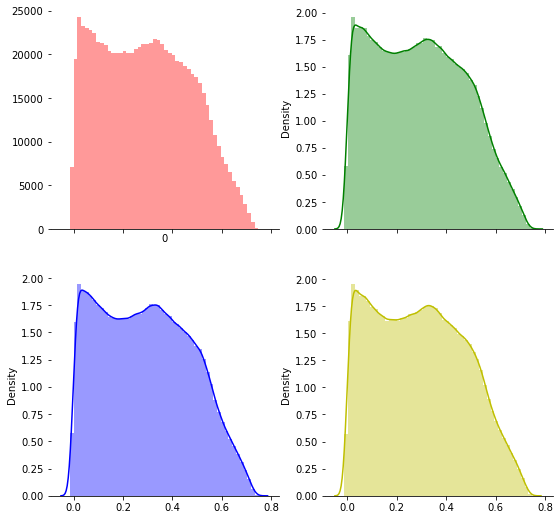

In [6]:
# 히스토그램: 구간을 나눠서 막대 그래프를 그림
# 히스토그램은 구간을 어떻게 설정하냐에 따라 결과물이 매우 달라져서, 엉뚱한 결론과 해석을 내릴 수 있기 때문에 조심
# 이에 대한 대안으로, 커널 밀도 추정(KDE: Kernel Density Estimator)
# 쉽게 얘기하면 히스토그램 같은 분포를 부드럽게 곡선화 시켜서 그려줌

import seaborn as sns
import matplotlib.pyplot as plt

# hist_0 = train.iloc[:,4:5]
hist_0 = train.iloc[:,4]
hist_1 = train.iloc[:,5:6]
hist_2 = train.iloc[:,6:7]
hist_3 = train.iloc[:,7:8]

# 시각화를 위한 축과 크기를 설정합니다.
f, axes = plt.subplots(2,2, figsize=(9,9), sharex=True)

# 보기 편하게 왼쪽 및 아래쪽 축을 제거합니다.
sns.despine(left=True)

# 각각의 분포를 4개로 나누어 함께 찍어봅니다
sns.distplot(hist_0, kde=False, color="r", ax=axes[0,0])
sns.distplot(hist_1, kde=True, color="g", ax=axes[0,1])
sns.distplot(hist_2, kde=True, color="b", ax=axes[1,0])
sns.distplot(hist_3, kde=True, color="y", ax=axes[1,1])

plt.show()

58
216
33
129


C:\Users\MMCL\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MMCL\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MMCL\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

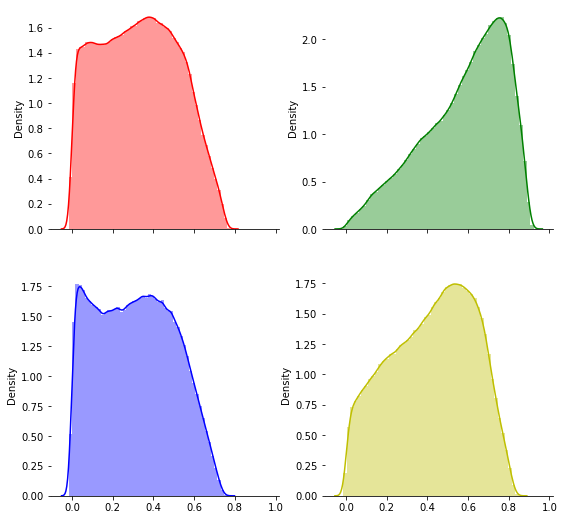

In [7]:
# 다양한 분포에서 랜덤 제너레이터를 지원하는 라이브러리를 호출합니다.
from random import * 

# 랜덤으로 4~230 사이의 정수 4개를 뽑습니다.
random_number = randint(4,230)
print(random_number)
     
hist_0 = train.iloc[:,random_number:random_number+1]

random_number = randint(4,230)
print(random_number)
hist_1 = train.iloc[:,random_number:random_number+1]

random_number = randint(4,230)
print(random_number)
hist_2 = train.iloc[:,random_number:random_number+1]

random_number = randint(4,230)
print(random_number)
hist_3 = train.iloc[:,random_number:random_number+1]

f, axes = plt.subplots(2,2, figsize=(9,9), sharex=True)

sns.despine(left=True)
sns.distplot(hist_0, kde=True, color="r", ax=axes[0,0])
sns.distplot(hist_1, kde=True, color="g", ax=axes[0,1])
sns.distplot(hist_2, kde=True, color="b", ax=axes[1,0])
sns.distplot(hist_3, kde=True, color="y", ax=axes[1,1])

plt.show()

반사율 스펙트럼 히스토그램 분포가 헤더별로 항상 같지는 않음

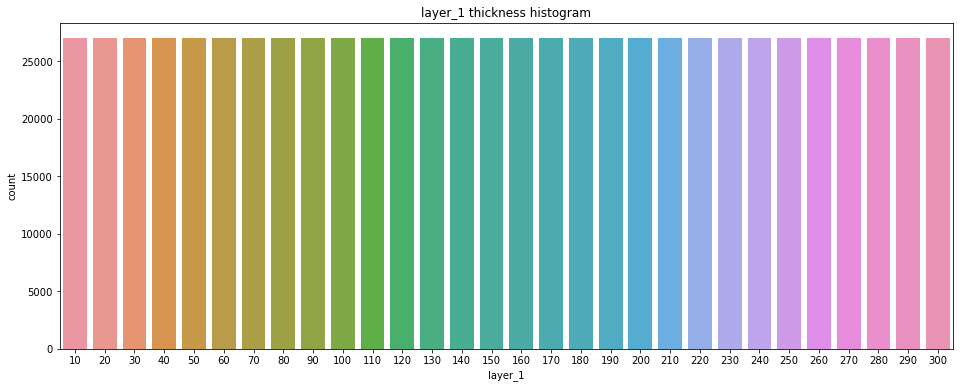

In [8]:
# 학습데이터 박막별 두께가 어떻게 분포하는지 확인
# countplot() : 데이터프레임의 카테고리마다 값의 개수를 세어 출력

fig, ax = plt.subplots(figsize=(16,6))   
sns.countplot(x="layer_1", data=train)
plt.title("layer_1 thickness histogram")
plt.show()

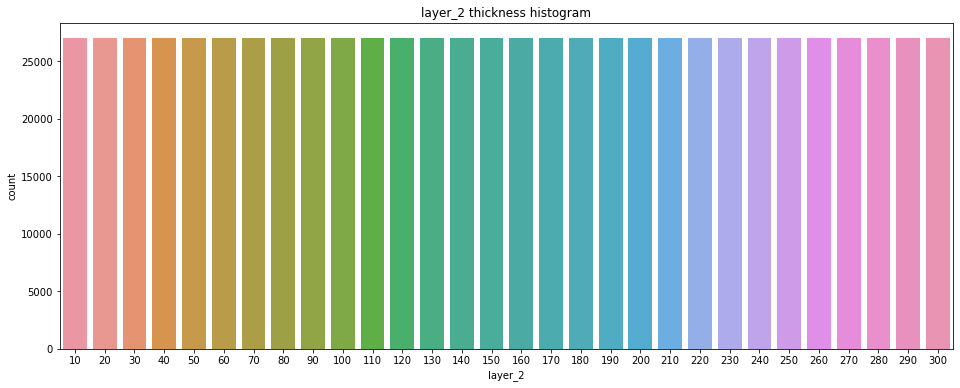

In [9]:
fig, ax = plt.subplots(figsize=(16,6))   
sns.countplot(x="layer_2", data=train)
plt.title("layer_2 thickness histogram")
plt.show()

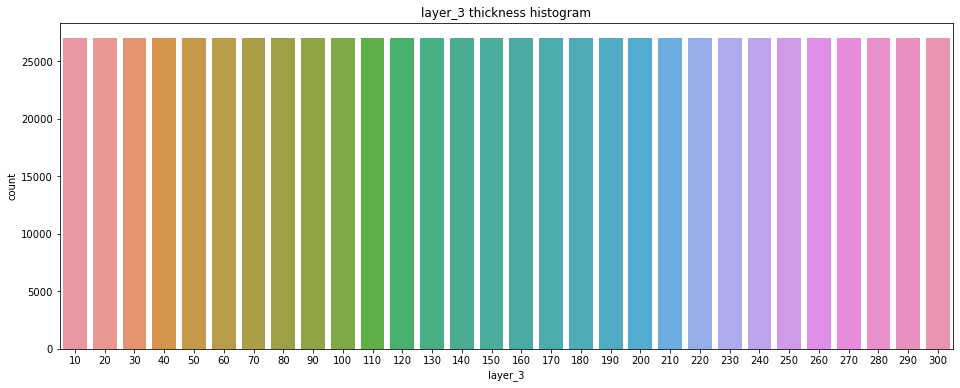

In [10]:
fig, ax = plt.subplots(figsize=(16,6))   
sns.countplot(x="layer_3", data=train)
plt.title("layer_3 thickness histogram")
plt.show()

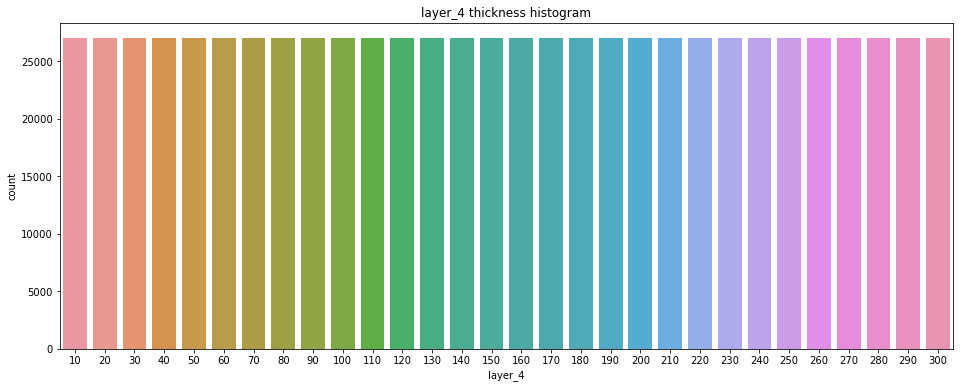

In [11]:
fig, ax = plt.subplots(figsize=(16,6))   
sns.countplot(x="layer_4", data=train)
plt.title("layer_4 thickness histogram")
plt.show()

가로축은 박막의 두께, 세로축은 그 두께 값이 몇 번 나타났는지. 두께 값 10~300. 두께마다 데이터 개수가 동일함.

In [12]:
# 반사율 스펙트럼 226개 칼럼 중 예측해야 할 박막 두께와의 상관관계

cor = train.corr()   # train 데이터 컬럼 간의 상관관계를 구합니다.
# cor.loc['layer_1':'layer_4','0':'225']는 상관계수로부터 layer_1~layer_4에 해당하는 행과 반사율 스펙트럼에 해당하는 '0':'225'행만을 선택합니다.
# style.background_gradient()로 판다스 display()의 출력 결과표에 수치에 따라 서로 다른 배경색을 칠할 수 있습니다.
# cmap은 컬러맵을 의미합니다. 'coolwarm'은 파란색에서 빨간색으로 변하는 컬러맵입니다.
# set_precision(2)으로 설정해 소수점 아래 둘째 자리까지만 값을 출력해 보겠습니다.    
display(cor.loc['layer_1':'layer_4','0':'225'].style.background_gradient(cmap='coolwarm').set_precision(2))

C:\Users\MMCL\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
layer_1,0.03,0.03,0.03,0.03,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.06,0.06,0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.03,0.03,0.03,0.02,0.02,0.01,0.01,0.01,0.00,-0.00,-0.01,-0.01,-0.01,-0.02,-0.02,-0.02,-0.03,-0.03,-0.03,-0.03,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,-0.00,-0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
layer_2,0.01,0.01,0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.03,-0.03,-0.03,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
layer_3,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.00,0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,

상관관계가 거의 0에 가까움. 따라서 여러 헤더를 종합적으로 이용해 예측해야 함.

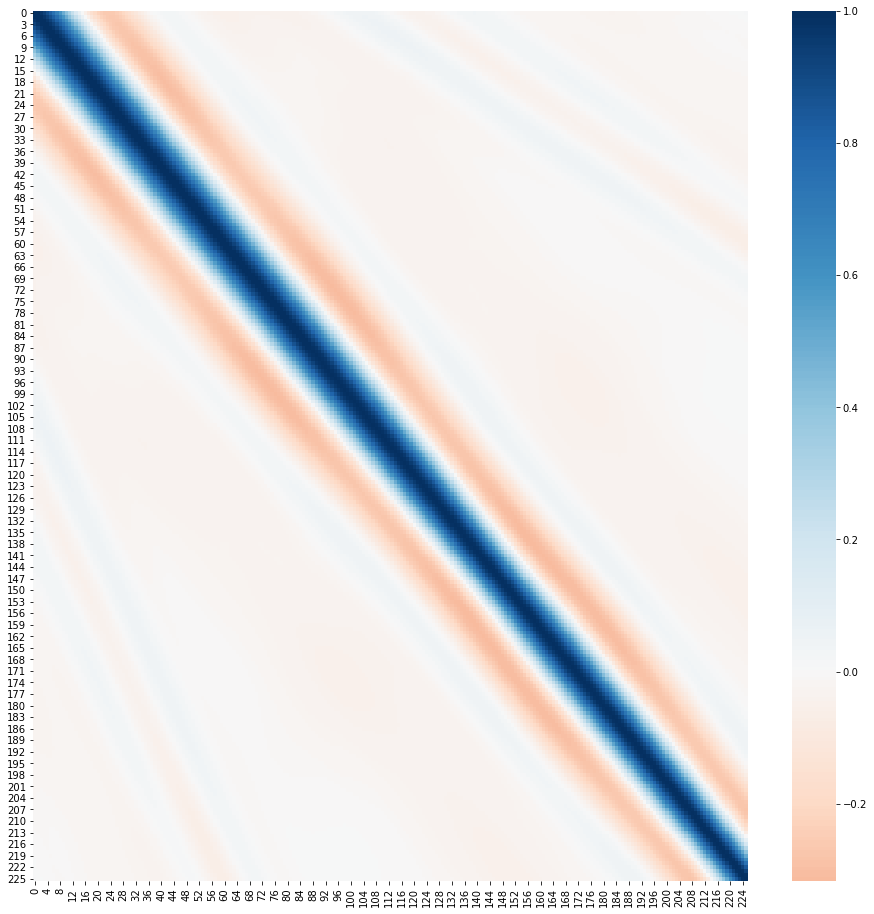

In [13]:
# 반사율 스펙트럼의 변수 간 상관관계

# 앞서 계산했던 전체 데이터의 상관관계 계수 테이블로부터 반사율 스펙트럼에 해당하는 행과 열만 선택합니다.
col_relation=cor.loc['0':'225','0':'225']
# figsize =(16,16)은 16인치*16인치 사이즈를 의미합니다.
fig, ax = plt.subplots(figsize=(16,16))   
# 반사율 스펙트럼 변수 간의 상관관계 테이블의 숫자를 색으로 표현하는 히트맵을 만들어 줍니다.
# cmap='RdBu'은 빨강~파랑 컬러맵을 뜻하고, annot=False로 지정해 테이블이 지저분하지 않게 수치 값을 출력하지 않았습니다. 상관관계 계수가 0이 될 때를 중심으로 상관관계를 살펴보고 싶으므로 컬러맵의 중앙을 의미하는 center 값을 0으로 지정합니다.
sns.heatmap(col_relation, annot=False, cmap="RdBu", center=0)
plt.show()

변수 간 번호가 가까운 칼럼 간의 상관관계는 강하게 나타남. 번호가 멀어지면 상관관계가 없는 것을 확인.

# 데이터 전처리

In [14]:
# 결측치 처리
# 각 열의 결측값 개수

null_check_train = train.isnull().sum()
null_check_test = test.isnull().sum()
print(null_check_train[null_check_train>0])
print(null_check_test[null_check_test>0])

Series([], dtype: int64)
Series([], dtype: int64)


In [15]:
from itertools import chain
import numpy as np
import pandas as pd

"""
원래 제공된 학습 데이터셋에서 일정 비율을 검증 데이터셋으로 나누어 다시 저장합니다.
train.csv에 있는 데이터를 분할하여 학습 데이터는 train_splited.csv 파일에 저장하고
검증 데이터는 val.csv 파일에 저장합니다.
"""
path_train = 'data/train.csv'

# 데이터를 섞어 다시 저장 시 인덱스 재정렬을 위한 작업을 진행합니다.
layers = [['layer_1','layer_2','layer_3','layer_4'], \
          [str(i) for i in np.arange(0,226).tolist()]]
layers = list(chain(*layers))

# train의 row를 random으로 섞어줍니다.
train = pd.read_csv(path_train)
print(train.shape)
train = train.sample(frac=1)
rows, cols = train.shape

(810000, 230)


In [16]:
# 학습 데이터에서 일정 비율(13%)을 잘라 검증 데이터로 구성한 후 저장합니다.
train1 = train.iloc[:rows - 80000,:]
train1 = train1.values
train1 = pd.DataFrame(data=train1,columns=layers)

# 판다스 라이브러리의 to_csv() 함수를 사용해 CSV 파일로 학습 데이터를 저장합니다.
train1.to_csv('data/train_splited.csv', index_label='id')
print("train file saved....")

train file saved....


In [17]:
# 마찬가지로 나머지 부분은 검증 데이터를 CSV 파일로 저장합니다.
val = train.iloc[rows - 80000:,:]
val = val.values
val = pd.DataFrame(data=val,columns=layers)
val.to_csv('data/val.csv', index_label='id')
print("validation file saved....")

validation file saved....


In [18]:
from torch.utils.data import Dataset

class PandasDataset(Dataset):
    """ Train dataset을 가져와서 torch 모델이 학습할 수 있는 tensor 형태로 반환합니다."""
    def __init__(self, path):
        # 부모의 생성자를 상속
        super(PandasDataset, self).__init__()
        train = pd.read_csv(path).iloc[:,1:]
        self.train_X, self.train_Y = train.iloc[:,4:], train.iloc[:,0:4]
        self.tmp_x , self.tmp_y = self.train_X.values, self.train_Y.values
    
    # 데이터셋의 크기를 리턴
    def __len__(self):
        return len(self.train_X)

    # idx번째의 샘플을 찾는 데 사용
    def __getitem__(self, idx):
        return {
            'X':torch.from_numpy(self.tmp_x)[idx],
            'Y':torch.from_numpy(self.tmp_y)[idx]
        }

In [19]:
import config

from torch.utils.data import DataLoader
from src.utils import PandasDataset

# 배치 사이즈는 하이퍼파라미터로 사용자가 직접 정의할 수 있습니다. 
batch_size=32

# 학습 데이터 csv와 검증 데이터 csv 경로를 지정해 줍니다.
train_path = config.TRAIN_PATH #'data/train_splited.csv'
val_path = config.VAL_PATH #'data/val.csv'

# Loader를 통해 Batch 크기로 데이터를 반환합니다.
train_dataset = PandasDataset(train_path)
train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=0)

val_dataset = PandasDataset(val_path)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=0)

# 모델 구축과 검증

In [20]:
# 머신러닝보다 딥러닝이 무조건 좋은 건가?

import torch.nn as nn

# torch.nn 모듈을 상속합니다.
class BaseLine(nn.Module):
    def __init__(self):
        # super()를 호출해야 BaseLine 클래스가 nn.Module의 속성을 가지고 초기화되므로
        # 반드시 필요합니다.
        super(BaseLine, self).__init__()
        # 각 nn.Sequential()은 Dense 층, 활성 함수, 배치 정규화를 포함하고 있습니다.
        self.block1 = nn.Sequential(nn.Linear(226,10000),nn.ReLU(), nn.BatchNorm1d(10000))
        self.block2 = nn.Sequential(nn.Linear(10000,7000),nn.ReLU(), nn.BatchNorm1d(7000))
        self.block3 = nn.Sequential(nn.Linear(7000,3000), nn.ReLU(), nn.BatchNorm1d(3000))
        self.block4 = nn.Sequential(nn.Linear(3000,1000),nn.ReLU(), nn.BatchNorm1d(1000))
        self.block5 = nn.Sequential(nn.Linear(1000, 300),nn.ReLU(), nn.BatchNorm1d(300))
        # 마지막 출력층은 활성 함수 및 배치 정규화를 사용하지 않습니다.
        self.fclayer = nn.Sequential(nn.Linear(300,4))
        # forward를 정의해 위에서 정의한 노드에 입력된 x가 실제로 계산되게 정의해줍니다.
        
    def forward(self, x):
        block1_out = self.block1(x)
        block2_out = self.block2(block1_out)
        block3_out = self.block3(block2_out)
        block4_out = self.block4(block3_out)
        block5_out = self.block5(block4_out)
        output = self.fclayer(block5_out)
        return output

In [21]:
class SkipConnectionModel(nn.Module):
    def __init__(self):
        super(SkipConnectionModel, self).__init__()
        
        self.upblock1 = nn.Sequential(nn.Linear(226,2000),GELU(),nn.BatchNorm1d(2000))
        self.upblock2 = nn.Sequential(nn.Linear(2000,4000),GELU(),nn.BatchNorm1d(4000))
        self.upblock3 = nn.Sequential(nn.Linear(4000,7000), GELU(),nn.BatchNorm1d(7000))
        self.upblock4 = nn.Sequential(nn.Linear(7000,10000),GELU(),nn.BatchNorm1d(10000))
        
        self.downblock1 = nn.Sequential(nn.Linear(10000,7000),GELU(),nn.BatchNorm1d(7000))
        self.downblock2 = nn.Sequential(nn.Linear(7000, 4000),GELU(),nn.BatchNorm1d(4000))
        self.downblock3 = nn.Sequential(nn.Linear(4000, 2000),GELU(),nn.BatchNorm1d(2000))
        self.downblock4 = nn.Sequential(nn.Linear(2000, 300),GELU(),nn.BatchNorm1d(300))
        self.dropout = nn.Dropout(0.1)
        self.fclayer = nn.Sequential(nn.Linear(300,4))
        
    def forward(self, x):
        upblock1_out = self.upblock1(x)
        upblock2_out = self.upblock2(upblock1_out)
        upblock3_out = self.upblock3(upblock2_out)
        upblock4_out = self.upblock4(upblock3_out)
        # 각 층의 출력과 잔차를 더합니다.
        downblock1_out = self.downblock1(upblock4_out)
        skipblock1 = downblock1_out + upblock3_out # 7000
        downblock2_out = self.downblock2(skipblock1)
        skipblock2 = downblock2_out + upblock2_out # 4000
        downblock3_out = self.downblock3(skipblock2)
        skipblock3 = downblock3_out + upblock1_out # 2000
        downblock4_out = self.downblock4(skipblock3)
        
        output = self.fclayer(downblock4_out)
        
        return output

In [22]:
class GELU(nn.Module):
    """
    Paper Section 3.4, last paragraph notice that BERT used the GELU instead of RELU
    """
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * torch.pow(x, 3))))

In [23]:
class LayerNorm(nn.Module):
    def __init__(self, hidden_size, eps=1e-5):
        """Construct a layernorm module in the TF style (epsilon inside the square root).
        """
        super(LayerNorm, self).__init__()
        # hidden_size 크기의 variable을 만듦
        # nn.Parameter을 사용해 autograd가 가능한 variable을 구성
        self.weight = nn.Parameter(torch.ones(hidden_size))
        self.bias = nn.Parameter(torch.zeros(hidden_size))
        self.variance_epsilon = eps

        self.init_weights()

    def init_weights(self):
        # x와 weights를 곱했을 때 다시 원래의 값을 가질 수 있게 1.0
        self.weight.data.fill_(1.0)
        # bias를 더했을 때 다시 원래의 값을 가질 수 있게 0
        self.bias.data.zero_()

    def forward(self, x):
        # 마지막 차원을 기준으로 평균, 표준편차를 구함
        u = x.mean(-1, keepdim=True)
        s = (x - u).pow(2).mean(-1, keepdim=True)
        x = (x - u) / torch.sqrt(s + self.variance_epsilon)
        return self.weight * x + self.bias

In [24]:
class SkipConnectionModel(nn.Module):
    """
    >> model = Model(f_in, f_out, 300, 2000, 4000, 7000, 10000)
    300, 2000, 4000, 7000, 10000 : channels
    """
    def __init__(self, fn_in=226, fn_out=4, *args):        
        super(SkipConnectionModel, self).__init__()
        self.ln = LayerNorm(10000) #10000
        self.ln1 = LayerNorm(7000) # 7000
        self.ln2 = LayerNorm(4000) # 4000
        self.ln3 = LayerNorm(2000) # 2000
        
        self.upblock1 = nn.Sequential(nn.Linear(fn_in, 2000),GELU(),nn.BatchNorm1d(2000))
        self.upblock2 = nn.Sequential(nn.Linear(2000,4000),GELU(),nn.BatchNorm1d(4000))
        self.upblock3 = nn.Sequential(nn.Linear(4000,7000), GELU(),nn.BatchNorm1d(7000))
        self.upblock4 = nn.Sequential(nn.Linear(7000,10000),GELU(),nn.BatchNorm1d(10000))

        self.downblock1 = nn.Sequential(nn.Linear(10000, 7000),GELU(),nn.BatchNorm1d(7000))
        self.downblock2 = nn.Sequential(nn.Linear(7000, 4000),GELU(),nn.BatchNorm1d(4000))
        self.downblock3 = nn.Sequential(nn.Linear(4000, 2000),GELU(),nn.BatchNorm1d(2000))
        self.downblock4 = nn.Sequential(nn.Linear(2000, 300),GELU(),nn.BatchNorm1d(300))
        
        self.fclayer = nn.Sequential(nn.Linear(300, fn_out))
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, x):
        upblock1_out = self.upblock1(x)
        upblock2_out = self.upblock2(upblock1_out)
        upblock3_out = self.upblock3(upblock2_out)
        upblock4_out = self.upblock4(upblock3_out)

        # upblock에서 나온 결괏값들의 정규화를 진행합니다.
        downblock1_out = self.downblock1(self.ln(upblock4_out))
        skipblock1 = downblock1_out + upblock3_out
        downblock2_out = self.downblock2(self.ln1(skipblock1))
        skipblock2 = downblock2_out + upblock2_out
        downblock3_out = self.downblock3(self.ln2(skipblock2))
        skipblock3 = downblock3_out + upblock1_out
        downblock4_out = self.downblock4(self.ln3(skipblock3))
        
        output = self.fclayer(downblock4_out)
        
        return output

계층 정규화 적용 시 손실의 감소 폭이 커서 빠르게 학습됨이 무슨 말?

In [25]:
# 옵티마이저 및 스케줄러 조정

import math
import torch
from torch.optim.lr_scheduler import LambdaLR


class PandasDataset(Dataset):
    """ Train dataset을 가져와서 torch 모델이 학습할 수 있는 tensor 형태로 반환합니다."""
    def __init__(self, path):
        super(PandasDataset, self).__init__()
        train = pd.read_csv(path).iloc[:,1:]
        self.train_X, self.train_Y = train.iloc[:,4:], train.iloc[:,0:4]
        self.tmp_x , self.tmp_y = self.train_X.values, self.train_Y.values
    
    def __len__(self):
        return len(self.train_X)

    def __getitem__(self, idx):
        return {
            'X':torch.from_numpy(self.tmp_x)[idx],
            'Y':torch.from_numpy(self.tmp_y)[idx]
        }

class TestDataset(Dataset):
    def __init__(self, path_test):
        super(TestDataset, self).__init__()
        test = pd.read_csv(path_test)
        self.test_X = test.iloc[:,1:]
        self.tmp_x = self.test_X.values
    
    def __len__(self):
        return len(self.test_X)

    def __getitem__(self, idx):
        return torch.from_numpy(self.tmp_x)[idx]

"""
학습 최적화를 위해 스케줄러를 활용합니다.
Pytorch 및 transformer의 스케줄러를 참고.
https://github.com/huggingface/transformers/blob/master/src/transformers/optimization.py
"""
def get_constant_schedule(optimizer, last_epoch=-1):
    """ Create a schedule with a constant learning rate.
    """
    return LambdaLR(optimizer, lambda _: 1, last_epoch=last_epoch)


def get_constant_schedule_with_warmup(optimizer, num_warmup_steps, last_epoch=-1):
    """ Create a schedule with a constant learning rate preceded by a warmup
    period during which the learning rate increases linearly between 0 and 1.
    """

    def lr_lambda(current_step):
        if current_step < num_warmup_steps:
            return float(current_step) / float(max(1.0, num_warmup_steps))
        return 1.0

    return LambdaLR(optimizer, lr_lambda, last_epoch=last_epoch)


def get_linear_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps, last_epoch=-1):
    """ Create a schedule with a learning rate that decreases linearly after
    linearly increasing during a warmup period.
    """

    def lr_lambda(current_step):
        if current_step < num_warmup_steps:
            return float(current_step) / float(max(1, num_warmup_steps))
        return max(
            0.0, float(num_training_steps - current_step) / float(max(1, num_training_steps - num_warmup_steps))
        )

    return LambdaLR(optimizer, lr_lambda, last_epoch)


def get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps, num_cycles=0.5, last_epoch=-1):
    """ Create a schedule with a learning rate that decreases following the
    values of the cosine function between 0 and `pi * cycles` after a warmup
    period during which it increases linearly between 0 and 1.
    """

    def lr_lambda(current_step):
        if current_step < num_warmup_steps:
            return float(current_step) / float(max(1, num_warmup_steps))
        progress = float(current_step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * float(num_cycles) * 2.0 * progress)))

    return LambdaLR(optimizer, lr_lambda, last_epoch)


def get_cosine_with_hard_restarts_schedule_with_warmup(
    optimizer, num_warmup_steps, num_training_steps, num_cycles=1.0, last_epoch=-1
):
    """ 학습률이 웜업 기간 이후 몇 번의 하드 리스타트를 하는 코사인 함수 값에 따라 감소하는
    스케줄러를 만듭니다. 웜업 기간에는 학습률이 0과 1 사이에서 선형으로 증가합니다.
    """

    def lr_lambda(current_step):
        if current_step < num_warmup_steps:
            return float(current_step) / float(max(1, num_warmup_steps))
        progress = float(current_step - num_warmup_steps) / \
            float(max(1, num_training_steps - num_warmup_steps))
        if progress >= 1.0:
            return 0.0
        return max(0.0, \
            0.5 * (1.0 + math.cos(math.pi * ((float(num_cycles) * progress) % 1.0))))

    return LambdaLR(optimizer, lr_lambda, last_epoch)

In [26]:
import os
import time

from tqdm.auto import tqdm

from torch.optim import AdamW

In [27]:
# 모델을 학습시키기 위한 하이퍼 파라미터를 설정합니다.
lr = config.LR
adam_epsilon = config.ADAM_EPSILON
epochs = config.EPOCHS
batch_size = config.BATCH_SIZE
warmup_step = config.WARMUP_STEPS

In [28]:
epochs = 4 # 실습 시간 단축을 위해 수정함

In [29]:
# original data : train.csv => random으로 섞어 미리 train_split data를 만들고
# evaluation을 위해서 val data를 따로 분리했습니다. (9:1)
# 모델 학습 데이터 경로를 설정합니다.
train_path = config.TRAIN_PATH
val_path = config.VAL_PATH

# Loader를 통해 Batch 데이터로 반환합니다.
train_dataset = PandasDataset(train_path)
train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=0)

val_dataset = PandasDataset(val_path)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=0) 

# 모델이 학습하는 전체 step을 계산합니다.
total_step = len(train_loader) * epochs
print(f"Total step is....{total_step}")

Total step is....2852


In [30]:
# 모델 인스턴스를 정의합니다.
model = SkipConnectionModel(fn_in=226, fn_out=4)  # channel은 모델에서 수정합니다.

# GPU 및 CUDA 환경이 마련되어 있다면, 모델 학습을 위해 CUDA 환경을 직접 설정합니다.
# 그렇지 않은 경우 자동으로 CPU를 설정하게 됩니다.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 모델을 GPU 메모리에 올립니다. gpu가 없는 환경은 자동으로 cpu가 설정됩니다.
model = model.to(device) 

# 손실함수와 옵티마이저
# 신경망 모델을 최적화할 수 있게 손실함수를 정의합니다.
# MAE를 사용합니다.
loss_fn = nn.L1Loss()

# 옵티마이저와 스케줄러의 파라미터를 정의합니다.
no_decay = ["bias", "LayerNorm.weight"] # decay하지 않을 영역 지정
optimizer_grouped_parameters = [
    {
        "params": [p for n, p in model.named_parameters() \
            if not any(nd in n for nd in no_decay)],
        "weight_decay": 0.0,
    },
    {"params": [p for n, p in model.named_parameters() \
        if any(nd in n for nd in no_decay)], "weight_decay": 0.0},
]

# 옵티마이저와 스케줄러 객체를 정의합니다.
optimizer = AdamW(optimizer_grouped_parameters, lr=lr, eps=adam_epsilon)
scheduler = get_cosine_with_hard_restarts_schedule_with_warmup(
    optimizer, num_warmup_steps=warmup_step, num_training_steps=total_step
)

decay하지 않을 영역 지정은 무슨 말? warmup이란?

In [31]:
# 모델 이름을 위해서 변수를 만듭니다.
version = time.localtime()[3:5]
curr_lr = lr

# train loss와 val loss를 지정합니다.
total_loss = 0.0
total_val_loss = 0.0
n_val_loss = 10000000. # best validation loss를 저장하기 위해서 변수 설정합니다.

if not os.path.exists('bin'):
    os.mkdir('bin')

for epoch in range(epochs):
    total_loss = 0 
    total_val_loss = 0
    for i, data in enumerate(tqdm(train_loader, desc='*********Train mode*******')):  # train 데이터를 부르고 학습합니다.
        # 학습 데이터를 부르고 학습합니다.
        # 순방향 정의
        pred = model(data['X'].float().to(device))
        loss = loss_fn(pred, data['Y'].float().to(device))
        
        # 역방향 정의
        # optimizer 객체를 사용해서 학습 가능한 가중치 변수에 대한 모든 변화도를
        # 0으로 만듭니다.
        optimizer.zero_grad()

        # loss에 따른 오차 역전파를 구합니다.
        loss.backward()

        # optimizer 객체의 파라미터들을 업데이트합니다.
        optimizer.step()

        # scheduler 객체의 파라미터들을 업데이트합니다.
        scheduler.step()
        
        total_loss += loss.item()
        
    train_loss = total_loss / len(train_loader)
    print ("Epoch [{}/{}], Train Loss: {:.4f}".format(epoch+1, epochs, train_loss))

    # 평가
    # 검증 데이터를 부르고 에포크마다 학습된 모델을 부르고 평가합니다. 
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(tqdm(val_loader, \
            desc='*********Evaluation mode*******')):
            pred = model(data['X'].float().to(device))
            loss_val = loss_fn(pred, data['Y'].float().to(device))
            
            total_val_loss += loss_val.item()
    val_loss = total_val_loss / len(val_loader)
    print ("Epoch [{}/{}], Eval Loss: {:.4f}".format(epoch+1, epochs, val_loss))
    
    # 검증 데이터에서 가장 낮은 평균 절대 오차를 보인 에포크의 모델을 저장합니다.
    if val_loss < n_val_loss:
        n_val_loss = val_loss
        #torch.save(model.state_dict(), f'bin/test_{version}.pth')
        torch.save(model.state_dict(), f'bin/test.pth')
        print("Best Model saved......")

*********Train mode*******:   0%|          | 0/713 [00:00<?, ?it/s]

Epoch [1/4], Train Loss: 151.2028


*********Evaluation mode*******:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [1/4], Eval Loss: 131.4052
Best Model saved......


*********Train mode*******:   0%|          | 0/713 [00:00<?, ?it/s]

Epoch [2/4], Train Loss: 55.8028


*********Evaluation mode*******:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [2/4], Eval Loss: 31.1057
Best Model saved......


*********Train mode*******:   0%|          | 0/713 [00:00<?, ?it/s]

Epoch [3/4], Train Loss: 12.4059


*********Evaluation mode*******:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [3/4], Eval Loss: 5.5159
Best Model saved......


*********Train mode*******:   0%|          | 0/713 [00:00<?, ?it/s]

Epoch [4/4], Train Loss: 2.8717


*********Evaluation mode*******:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch [4/4], Eval Loss: 1.7114
Best Model saved......


- 모델의 출력값 pred와 실제 정답인 data['Y']의 차이를 통해 손실을 구함
- 오차 역전파 수행
- 각 파라미터의 지역적인 그래디언트가 구해지면 그래디언트의 반대 방향으로 파라미터 업데이트(최적화)

- 학습데이터에서 한 번 학습이 끝났을 때 검증 데이터로 검증. 모델 파라미터를 고정시키고 위와 동일한 과정을 반복
- 검증 데이터로는 학습하지 않으므로 loss.backward(), optimizer.step() 진행 안함

왜 model.eval()을 선언해놓고 또 with torch.no_grad():로 감싸주는거지?

처음 접했을 땐, 전자만 사용하면 되지않나라고 막연하게 생각할 수도 있다. 그렇지만, 이 둘 사이에는 차이가 있다.

with torch.no_grad()
이와 같이 no_grad() with statement에 포함시키게 되면 Pytorch는 autograd engine을 꺼버린다. 이 말은 더 이상 자동으로 gradient를 트래킹하지 않는다는 말이 된다. 그러면 이런 의문이 들 수 있다. loss.backward()를 통해 backpropagation을 진행하지 않는다면 뭐 gradient를 게산하든지 말든지 큰 상관이 없는 것이 아닌가?

맞는 말이다. torch.no_grad()의 주된 목적은 autograd를 끔으로써 메모리 사용량을 줄이고 연산 속도를 높히기 위함이다. 사실상 어짜피 안쓸 gradient인데 inference시에 굳이 계산할 필요가 없지 않은가?

그래서 일반적으로 inference를 진행할 때는 torch.no_grad() with statement로 감싼다는 사실을 알면 된다.

model.eval()
그럼 여기서 다시 처음 질문으로 돌아와서 위의 torch.no_grad()만 쓰면 되지 않나? gradient 계산 안하고 이제 됐잖아 라고 생각할 수 있다. 맞는 말이지만, model.eval()의 역할은 약간 다르다. 현재(2019년) 시점에서는 모델링 시 training과 inference시에 다르게 동작하는 layer들이 존재한다. 예를 들면, Dropout layer는 학습시에는 동작해야하지만, inference시에는 동작하지 않는 것과 같은 예시를 들 수 있다. BatchNorm같은 경우도 마찬가지다.

사실상 model.eval()는 이런 layer들의 동작을 inference(eval) mode로 바꿔준다는 목적으로 사용된다. 따라서, 우리가 보통 원하는 모델의 동작을 위해서는 위의 두 가지를 모두 사용해야하는 것이 맞다.

## 하이퍼파라미터(배치 크기, 은닉층 노드 개수, 레이어 구성 조정)

In [32]:
# 모델 평가 시 GPU를 사용하기 위해서 설정.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 테스트 데이터 위치
path_test = 'data/test.csv'

# pth 파일(모델 한 개 예시)
# 학습을 통해 저장된 pth 파일을 가져옵니다.
pth_bin = 'bin/test.pth' # 학습해서 이미 모델이 저장되어 있어야합니다.

# CSV가 저장될 디렉터리를 미리 만들어 놓습니다.
if not os.path.exists('test'):  # 'test' 는 USER에 맞게 지정하시면 됩니다.
    os.mkdir('test')

########################################
######### 모델 하나에 대한 테스트 ##########
########################################

# Test Model
# 모델을 테스트하기 위해서 모델을 다시 정의합니다.
test_model = SkipConnectionModel(fn_in=226, fn_out=4)
test_model = test_model.to(device)

In [33]:
# Test dataset을 불러옵니다.
test_data = TestDataset(path_test)
test_loader = DataLoader(test_data, batch_size=10000, num_workers=0)

# 테스트 데이터를 불러와서 모델로 결과를 예측하고 그 결과를 파일로 씁니다.
with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        outputs = test_model(data.float())
pred_test = outputs

RuntimeError: CUDA out of memory. Tried to allocate 268.00 MiB (GPU 0; 8.00 GiB total capacity; 5.76 GiB already allocated; 43.75 MiB free; 6.09 GiB reserved in total by PyTorch)

테스트에서는 이미 학습한 신경망 퍼셉트론의 계수를 업데이트 하면 안되므로 torch.no_grad를 적용해 역전파되는 그래프를 해제

In [ ]:
sample_sub = pd.read_csv('data/sample_submission.csv', index_col=0)
layers = ['layer_1','layer_2','layer_3','layer_4'] # 데이터의 컬럼명을 정의해줍니다.
submission = sample_sub.values + pred_test.cpu().numpy() # 파일을 쓸 때 CPU에서 진행합니다.

submission = pd.DataFrame(data=submission,columns=layers)
submission.to_csv('./test/submission.csv', index_label='id')

## 앙상블

In [ ]:
output_1 = [0.7, 0.1, 0.2]
output_2 = [0.5, 0.2, 0.3]
output_3 = [0.3, 0.4, 0.3]


def hard_voting(output_1, output2, output_3):
    
    result = [0,0,0]
    
    # 각 output에서 가장 큰 수의 인덱스를 찾습니다.
    output_1_max_value = max(output_1)
    output_1_max_index = output_1.index(output_1_max_value)
    result[output_1_max_index] += 1

    output_2_max_value = max(output_2)
    output_2_max_index = output_2.index(output_2_max_value)
    result[output_2_max_index] += 1

    output_3_max_value = max(output_3)
    output_3_max_index = output_3.index(output_3_max_value)
    result[output_3_max_index] += 1

    return result


result = hard_voting(output_1, output_2, output_3)
print(result)

In [ ]:
output_1 = [0.7, 0.1, 0.2]
output_2 = [0.5, 0.2, 0.3]
output_3 = [0.3, 0.4, 0.3]


def soft_voting(output_1, output2, output_3):
    
    result = [0,0,0]
    
    # 각 output의 소프트 맥스 확률을 더합니다.
    result = [(x+y+z)/3 for x,y,z in zip(output_1, output_2, output_3)]
    
    return result


result = soft_voting(output_1, output_2, output_3)
print(result)